<a href="https://colab.research.google.com/github/anishmahapatra/Classification-Telecom-Customer-Churn/blob/main/Classification_Telecom_Customer_Churn_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Customer Attrition in the Telecom Industry using Machine Learning

Master's in Data Science from<br/>
Liverpool John Moores University <br/>
*Date: April, 2020 <br/>
Author: Anish Mahapatra* 

This notebook is based on the IBM Watson Telecom Dataset. We will go through all of the steps:

- Data Selection
- Data Preprocessing
- Data Transformation
- Data Visualization
- Class Balancing
- Model Building
- Model Evaluation
- Model Review

<b>Aim:</b> <br/>The purpose of this notebook is to analyze, visualize and model (classification) [IBM Telecom Dataset](https://www.kaggle.com/blastchar/telco-customer-churn).

The Telecom Dataset has been pulled from the IBM Watson Website. The level of the Data is at a <b>Customer Id</b> Level.



<a name="0"></a>
## Table of Contents

1 [Loading the Data](#1) <br/>
2 [Quick EDA](#2) <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.1 [Pandas Profiling](#2.1) <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2 [SweetViz](#2.2) <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.3 [Dataprep](#2.3) <br/>
3 [Pre-processing](#3) <br/>


<a name="1"></a>
## 1 Loading the Data
Back to [Table of Contents](#0)

---


In [ ]:
# Installing the required packages

! pip uninstall -y pandas-profiling &> /dev/null                # Package for pandas profiling - visualization
! pip install pandas-profiling[notebook,html] &> /dev/null      # Uninstalling and reinstalling it due to a bug in Google Colab
! pip install sweetviz &> /dev/null                             # Package for some sweet visualizations
! pip install -U dataprep &> /dev/null                          # Package for instant data preparation
! pip install --upgrade plotly &> /dev/null                     # Updating plotly to the latest version
! pip install jupyter-dash &> /dev/null                         # Installing jupyter-dash 
! pip install pydotplus &> /dev/null                            # Visualization library

In [ ]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import re
import os

# Removing the minimum display columns to 500
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

# Hide Warnings
warnings.filterwarnings('ignore') #adjust display options

%matplotlib inline 

In [ ]:
# Let us import the required packages

from dash.dependencies import Input, Output
from pandas_profiling import ProfileReport          # Pandas Profile to visualize the data
from dataprep.eda import plot_correlation           # Importing a package to visualize data correlation
from dataprep.eda import plot_missing               # Importing packge to plot the missing values of the dataset
from jupyter_dash import JupyterDash                # Importing Jupter Dash to use visualization components 

from IPython.display import display                 # Displaying widgets
import dash_html_components as html                 # To leverage html components in the visualization
import dash_core_components as dcc                  # Importing dash core components for visualization
import matplotlib.ticker as ticker                  # User-defined function for formatting graphs
import plotly.graph_objects as go                   # To use graph objects within visualizations

from plotly.offline import iplot                    # Used for interactive plots
import matplotlib.pyplot as plt                     # Importing matplotlib for visualization
from dataprep.eda import plot                       # Importing package to plot/ visualize features of the dataset
import ipywidgets as widgets                        # Creating widgets
import plotly.express as px                         # Importing plotly express for visualizations
import matplotlib.cm as cm                          # Colormaps, colormaps handling utilities

import pandas_profiling                             # Automatic EDA
import sweetviz as sv                               # Importing sweetviz for some sweet visualizations
import seaborn as sns                               # Importing seaborn for visualization
import pandas as pd                                 # Importing pandas
import numpy as np                                  # Importing numpy
%matplotlib inline    
import warnings                                     # Importing package to toggle warnings
import IPython                                      # Importing ipython for displaying html files in the notebook

# Removing the minimum display columns to 500
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Hide Warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np 
import pandas as pd
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
import seaborn as sns; sns.set()

from sklearn import tree
import graphviz 
import os

import numpy as np 
import pandas as pd 
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import lightgbm

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Reading the file onto Google Colab from GitHub using pandas library
telecomDf = pd.read_csv("https://raw.githubusercontent.com/anishmahapatra/Telecom-Customer-Churn/main/Data/WA_Fn-UseC_-Telco-Customer-Churn.csv")    # Reading file zomato.csv

In [ ]:
df = telecomDf.copy(deep = True)
# Viewing the head of the data
df.head().T

In [ ]:
df.shape

In [ ]:
# Let's view a summary of the dataset now
print(df.info(verbose=True))

**Variable Descriptions**
- gender --> Whether the customer is a male or a female
- SeniorCitizen --> Whether the customer is a senior citizen or not (1, 0)
- Partner --> Whether the customer has a partner or not (Yes, No)
- Dependents --> Whether the customer has dependents or not (Yes, No)
- tenure --> Number of months the customer has stayed with the company
- PhoneService --> Whether the customer has a phone service or not (Yes, No)
- MultipleLines --> Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService --> Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity --> Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup --> Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection --> Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport --> Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV --> Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies --> Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract --> The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling --> Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod --> The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges --> The amount charged to the customer monthly
- TotalCharges --> The total amount charged to the customer
- Churn --> Whether the customer churned or not (Yes or No)

In [ ]:
df.isnull().sum().sum()

<a name="2"></a>
## 2 Quick EDA
Back to [Table of Contents](#0)

---


Now that we have some basic data understanding of the data we are dealing with, it's time to try and understand things a little more in details. We will proceed to <b>analyze and explore the data</b>. There is a common term in the Data Science community that we use to describe this: <u>Exploratory Data Analysis</u> (<b>[EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis)</b>).</n>


Exploratory Data Analysis is used to get a <i>feel</i> of the data. We use it to understand the attributes, gaps and behaviour that the data has. A traditional way of doing it can be looking at the data column by column, row by row. As more developers contribute to the open-source python ecosystem, we have great packages that can help us analyze the data with minimal effort.


<a name="2.1"></a>
### 2.1 Pandas Profiling
Back to [Table of Contents](#0)

In [ ]:
# Making a copy of the dataset as df
df = telecomDf.copy(deep = True)

In [ ]:
# Generating the profile report and feeding it into a variable
Profile = ProfileReport(df, title = 'Telecom Data: Pandas Profiling Report', html = {'style':{'full_width':True}})

In [ ]:
# Showcasing the Pandas Profiling Report for the Zomato Dataset
Profile

<a name="2.2"></a>
### 2.2 SweetViz
Back to [Table of Contents](#0)

The [SweetViz](https://pypi.org/project/sweetviz/) package is a pandas-based library to visualize and compare datsets. <br/>
It is used for in-depth EDA to generate beautiful, high-density visualizations. 

In [ ]:
# We shall use the SweetViz analyze() function to generate a shareable .html file to analyze the dataset
sweetvizReport = sv.analyze(df)
sweetvizReport.show_html('SweetViz.html', open_browser=False)

We now generate the SweetViz html file and generate the html file for it. We can see

In [ ]:
# Displaying the html file in the Google Colab notebook
IPython.display.HTML('SweetViz.html')

<a name="2.3"></a>
### 2.3 Dataprep
Back to [Table of Contents](#0)

[Dataprep](https://github.com/sfu-db/dataprep) is a python package to collect data, perform eda, clean and standardize data.

In [ ]:
# Plotting the features of the dataframe
# plot(df)

In [ ]:
# Plotting the correlation of the dataframe
plot_correlation(df)

In [ ]:
# Analyzing the miissing values from the dataset and visualizing it 
plot_missing(df)

In [ ]:
df.drop("customerID", axis=1, inplace=True)

In [ ]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: 0 if x == ' ' else x)

In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])

<a name="3"></a>
## 3 Visualization Analysis
Back to [Table of Contents](#0)

---


<a name="3.1"></a>
### 3.1 Distribution of Each Feature
Back to [Table of Contents](#0)

In [ ]:
dataset = df.copy(deep=True)

In [ ]:
categorical = (dataset.dtypes == "object")
categorical_list = list(categorical[categorical].index)

print("Categorical variables:")
print(categorical_list)

In [ ]:
numerical_int64 = (dataset.dtypes == "int64")
numerical_int64_list = list(numerical_int64[numerical_int64].index)

print("Categorical variables:")
print(numerical_int64_list)

In [ ]:
plt.figure(figsize=(50,50))
j = 0

for i in categorical_list:
    colors = ['#C0C0C0','#66b3ff','#99ff99','#ffcc99','#fbdf70','#ac9fd0','#8b7470']
    
    labels = dataset[i].value_counts().index
    sizes = dataset[i].value_counts().values
    
    unique = len(dataset[i].unique())
    if(unique == 2):
        myexplode = [0.1, 0]
    if(unique == 3):
        myexplode = [0.1, 0,0]
    if(unique == 4):
        myexplode = [0.1,0,0,0]
    
    plt.subplot(5,4,j+1)
    plt.pie(sizes, labels=labels, shadow = True, startangle=90, colors=colors, autopct='%1.1f%%',textprops={'fontsize': 25})
    plt.title(f'Distribution of {i}',color = 'black',fontsize = 30)
    j += 1

<a name="3.2"></a>
### 3.2 Distribution of each feature based on 'Churn'
Back to [Table of Contents](#0)

Gender

In [ ]:
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('gender = Female')
dataset.groupby('gender').Churn.value_counts().loc['Female'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('gender = Male')
dataset.groupby('gender').Churn.value_counts().loc['Male'].plot(kind='bar')

Partner

In [ ]:
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('Partner = Yes')
dataset.groupby('Partner').Churn.value_counts().loc['Yes'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('Partner = No')
dataset.groupby('Partner').Churn.value_counts().loc['No'].plot(kind='bar')

Dependents

In [ ]:
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('Dependents = Yes')
dataset.groupby('Dependents').Churn.value_counts().loc['Yes'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('Dependents = No')
dataset.groupby('Dependents').Churn.value_counts().loc['No'].plot(kind='bar')

Phone Service

In [ ]:
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('PhoneService = Yes')
dataset.groupby('PhoneService').Churn.value_counts().loc['Yes'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('PhoneService = No')
dataset.groupby('PhoneService').Churn.value_counts().loc['No'].plot(kind='bar')

Multiple Lines

In [ ]:
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('MultipleLines = Yes')
dataset.groupby('MultipleLines').Churn.value_counts().loc['Yes'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('MultipleLines = No')
dataset.groupby('MultipleLines').Churn.value_counts().loc['No'].plot(kind='bar')

plt.subplot(2,3,3)
plt.title('MultipleLines = No phone service')
dataset.groupby('MultipleLines').Churn.value_counts().loc['No phone service'].plot(kind='bar')

Internet Service

In [ ]:
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('InternetService = DSL')
dataset.groupby('InternetService').Churn.value_counts().loc['DSL'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('InternetService = No')
dataset.groupby('InternetService').Churn.value_counts().loc['No'].plot(kind='bar')

plt.subplot(2,3,3)
plt.title('InternetService = Fiber optic')
dataset.groupby('InternetService').Churn.value_counts().loc['Fiber optic'].plot(kind='bar')

Online Security

In [ ]:
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('OnlineSecurity = Yes')
dataset.groupby('OnlineSecurity').Churn.value_counts().loc['Yes'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('OnlineSecurity = No')
dataset.groupby('OnlineSecurity').Churn.value_counts().loc['No'].plot(kind='bar')

plt.subplot(2,3,3)
plt.title('OnlineSecurity = No internet service')
dataset.groupby('OnlineSecurity').Churn.value_counts().loc['No internet service'].plot(kind='bar')

Online Backup

In [ ]:
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('OnlineBackup = Yes')
dataset.groupby('OnlineBackup').Churn.value_counts().loc['Yes'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('OnlineBackup = No')
dataset.groupby('OnlineBackup').Churn.value_counts().loc['No'].plot(kind='bar')

plt.subplot(2,3,3)
plt.title('OnlineBackup = No internet service')
dataset.groupby('OnlineBackup').Churn.value_counts().loc['No internet service'].plot(kind='bar')

Device Protection

In [ ]:
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('DeviceProtection = Yes')
dataset.groupby('DeviceProtection').Churn.value_counts().loc['Yes'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('DeviceProtection = No')
dataset.groupby('DeviceProtection').Churn.value_counts().loc['No'].plot(kind='bar')

plt.subplot(2,3,3)
plt.title('DeviceProtection = No internet service')
dataset.groupby('DeviceProtection').Churn.value_counts().loc['No internet service'].plot(kind='bar')

Tech Support

In [ ]:
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('TechSupport = Yes')
dataset.groupby('TechSupport').Churn.value_counts().loc['Yes'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('TechSupport = No')
dataset.groupby('TechSupport').Churn.value_counts().loc['No'].plot(kind='bar')

plt.subplot(2,3,3)
plt.title('TechSupport = No internet service')
dataset.groupby('TechSupport').Churn.value_counts().loc['No internet service'].plot(kind='bar')

Streaming TV

In [ ]:
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('StreamingTV = Yes')
dataset.groupby('StreamingTV').Churn.value_counts().loc['Yes'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('StreamingTV = No')
dataset.groupby('StreamingTV').Churn.value_counts().loc['No'].plot(kind='bar')

plt.subplot(2,3,3)
plt.title('StreamingTV = No internet service')
dataset.groupby('StreamingTV').Churn.value_counts().loc['No internet service'].plot(kind='bar')

Streaming Movies

In [ ]:
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('StreamingMovies = Yes')
dataset.groupby('StreamingMovies').Churn.value_counts().loc['Yes'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('StreamingMovies = No')
dataset.groupby('StreamingMovies').Churn.value_counts().loc['No'].plot(kind='bar')

plt.subplot(2,3,3)
plt.title('StreamingMovies = No internet service')
dataset.groupby('StreamingMovies').Churn.value_counts().loc['No internet service'].plot(kind='bar')

Contract

In [ ]:
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('Contract = Month-to-month')
dataset.groupby('Contract').Churn.value_counts().loc['Month-to-month'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('Contract = One year')
dataset.groupby('Contract').Churn.value_counts().loc['One year'].plot(kind='bar')

plt.subplot(2,3,3)
plt.title('Contract = Two year')
dataset.groupby('Contract').Churn.value_counts().loc['Two year'].plot(kind='bar')

Paperless Billing

In [ ]:
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('PaperlessBilling = Yes')
dataset.groupby('PaperlessBilling').Churn.value_counts().loc['Yes'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('PaperlessBilling = No')
dataset.groupby('PaperlessBilling').Churn.value_counts().loc['No'].plot(kind='bar')

Payment Method

In [ ]:
plt.figure(figsize=(25,15))
sns.set_theme(style="darkgrid")

plt.subplot(2,2,1)
plt.title('PaymentMethod = Electronic check')
dataset.groupby('PaymentMethod').Churn.value_counts().loc['Electronic check'].plot(kind='bar')

plt.subplot(2,2,2)
plt.title('PaymentMethod = Mailed check')
dataset.groupby('PaymentMethod').Churn.value_counts().loc['Mailed check'].plot(kind='bar')

plt.subplot(2,2,3)
plt.title('PaymentMethod = Bank transfer (automatic)')
dataset.groupby('PaymentMethod').Churn.value_counts().loc['Bank transfer (automatic)'].plot(kind='bar')

plt.subplot(2,2,4)
plt.title('PaymentMethod = Credit card (automatic)')
dataset.groupby('PaymentMethod').Churn.value_counts().loc['Credit card (automatic)'].plot(kind='bar')

<a name="3.3"></a>
### 3.3 Numerical values, value ranges and distributions
Back to [Table of Contents](#0)

In [ ]:
plt.figure(figsize=(25,15))

plt.subplot(2,3,1)
sns.histplot(dataset['MonthlyCharges'], color = 'red', kde = True).set_title('MonthlyCharges Interval and Counts')

plt.subplot(2,3,2)
sns.histplot(dataset['TotalCharges'], color = 'green', kde = True).set_title('TotalCharges Interval and Counts')

plt.subplot(2,3,3)
sns.histplot(dataset['tenure'], color = 'blue', kde = True).set_title('tenure Interval and Counts')

The relationship between 'MonthlyCharges' and 'TotalCharges' and the correlation with 'gender' and 'tenure'.

In [ ]:
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(20,10))
sns.despine(f, left=True, bottom=True)
sns.set_theme(style="darkgrid")
sns.scatterplot(x=dataset['MonthlyCharges'], y=dataset['TotalCharges'],
                hue=dataset['gender'], 
                size="tenure",
                palette='tab20',
                hue_order=dataset['gender'],
                sizes=(20, 50), 
                linewidth=0,
                data=dataset)

Distribution of Samples According to 'Churn' = Yes or 'Churn' = No with Histograms

In [ ]:
plt.figure(figsize=(50,50))
j = 0
sns.set_theme(style="whitegrid")
for i in categorical_list:
    
    plt.subplot(5,4,j+1)
    sns.histplot(dataset, x="Churn",  hue=dataset[i], multiple="stack", palette="light:m_r", edgecolor=".3", linewidth=.5)
    plt.title(f'Distribution of {i}',color = 'black',fontsize = 25)
    j += 1

Correlation

In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(dataset.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

As seen from Heat Map, there is a high correlation between 'tenure' and 'TotalCharges'.

Another notable correlation is between 'MonthlyCharges' and 'TotalCharges'

Seaborn pairplot

In [ ]:
sns.pairplot(dataset, hue = 'Churn')

Skewness

In [ ]:
dataset.agg(['skew'])

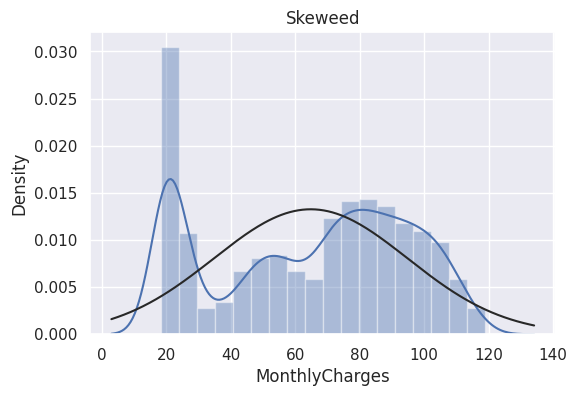

mu MonthlyCharges : 64.76169246059918, sigma MonthlyCharges : 30.087910854936975



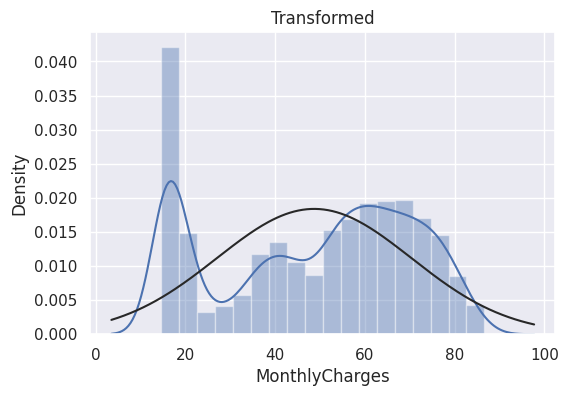

mu MonthlyCharges : 48.7129942491654, sigma MonthlyCharges : 21.702319308412328



In [ ]:
skews = ['MonthlyCharges']
from scipy.stats import norm, skew, boxcox
for i in skews:
    sns.set_style('darkgrid')
    sns.distplot(dataset[i], fit = norm)
    plt.title('Skewed')
    plt.show()
    (mu, sigma) = norm.fit(dataset[i])
    print("mu {} : {}, sigma {} : {}".format(i, mu, i, sigma))
    print()
    
    dataset[i], lam = boxcox(dataset[i])

    sns.set_style('darkgrid')
    sns.distplot(dataset[i], fit = norm)
    plt.title('Transformed')
    plt.show()
    (mu, sigma) = norm.fit(dataset[i])
    print("mu {} : {}, sigma {} : {}".format(i, mu, i, sigma))
    print()

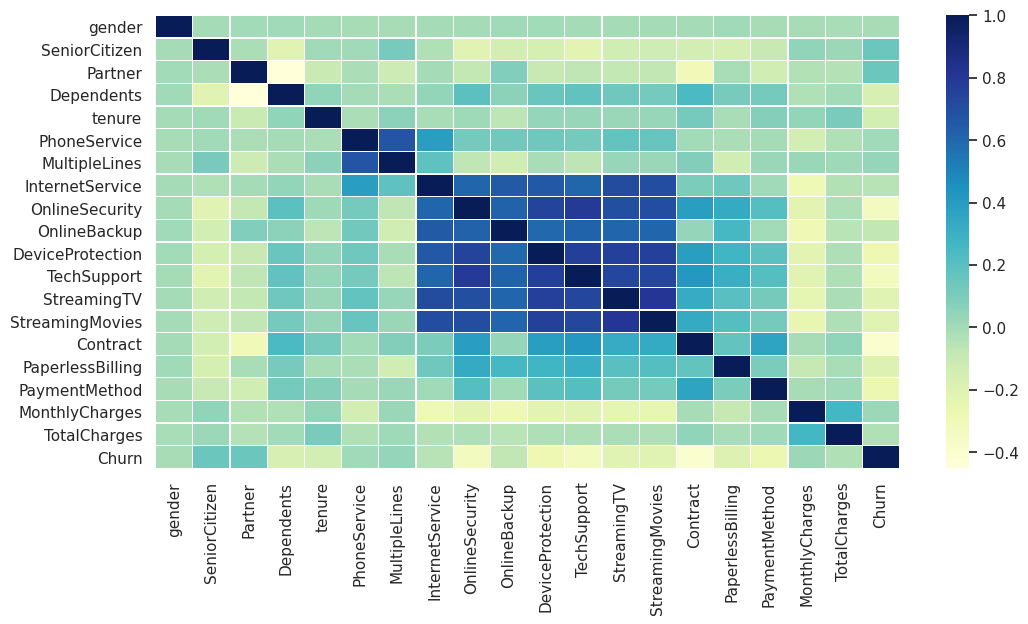

In [ ]:
plt.figure(figsize=(12, 6))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

<a name="4"></a>
## 4 Modelling
Back to [Table of Contents](#0)

---


<a name="4.1"></a>
### 4.1 Encoding
Back to [Table of Contents](#0)

Uniqueness of each feature

In [ ]:
label_encoding = []
one_hot = []

for x in categorical_list:
    a = dataset[x].unique()
    print(f'Unique Values for {x}: ', dataset[x].unique())
    if(len(a) == 2):
        label_encoding.append(x)
    else:
        one_hot.append(x)

Unique Values for gender:  ['Female' 'Male']
Unique Values for Partner:  ['Yes' 'No']
Unique Values for Dependents:  ['No' 'Yes']
Unique Values for PhoneService:  ['No' 'Yes']
Unique Values for MultipleLines:  ['No phone service' 'No' 'Yes']
Unique Values for InternetService:  ['DSL' 'Fiber optic' 'No']
Unique Values for OnlineSecurity:  ['No' 'Yes' 'No internet service']
Unique Values for OnlineBackup:  ['Yes' 'No' 'No internet service']
Unique Values for DeviceProtection:  ['No' 'Yes' 'No internet service']
Unique Values for TechSupport:  ['No' 'Yes' 'No internet service']
Unique Values for StreamingTV:  ['No' 'Yes' 'No internet service']
Unique Values for StreamingMovies:  ['No' 'Yes' 'No internet service']
Unique Values for Contract:  ['Month-to-month' 'One year' 'Two year']
Unique Values for PaperlessBilling:  ['Yes' 'No']
Unique Values for PaymentMethod:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Unique Values for Churn:  ['No' 'Ye

**Label Encoding**

Label Encoding is an encoding technique for handling categorical variables. In this technique, each data is assigned a unique integer.

In [ ]:
for y in label_encoding:
    var = dataset[y].unique()
    y_mapping = {var[0]: 0, var[1]: 1}
    dataset[y] = dataset[y].map(y_mapping)

**One-Hot Encoding**

One Hot Encoding is the binary representation of categorical variables. This process requires categorical values to be mapped to integer values first. Next, each integer value is represented as a binary vector with all values zero except the integer index marked with 1.

One Hot Encoding makes the representation of categorical data more expressive and easy. Many machine learning algorithms cannot work directly with categorical data, so categories must be converted to numbers. This operation is required for input and output variables that are categorical.

In this part, I converted categorical datas to the binary values. This operation increases the accuracy.

In [ ]:
for i in range(0, len(one_hot)):
    dataset[f'{one_hot[i]}'] = pd.Categorical(dataset[f'{one_hot[i]}'])
    dummies = pd.get_dummies(dataset[f'{one_hot[i]}'], prefix = f'{one_hot[i]}_encoded')
    dataset.drop([f'{one_hot[i]}'], axis=1, inplace=True)
    dataset = pd.concat([dataset, dummies], axis=1)

In [ ]:
dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_encoded_No,MultipleLines_encoded_No phone service,MultipleLines_encoded_Yes,InternetService_encoded_DSL,InternetService_encoded_Fiber optic,InternetService_encoded_No,OnlineSecurity_encoded_No,OnlineSecurity_encoded_No internet service,OnlineSecurity_encoded_Yes,OnlineBackup_encoded_No,OnlineBackup_encoded_No internet service,OnlineBackup_encoded_Yes,DeviceProtection_encoded_No,DeviceProtection_encoded_No internet service,DeviceProtection_encoded_Yes,TechSupport_encoded_No,TechSupport_encoded_No internet service,TechSupport_encoded_Yes,StreamingTV_encoded_No,StreamingTV_encoded_No internet service,StreamingTV_encoded_Yes,StreamingMovies_encoded_No,StreamingMovies_encoded_No internet service,StreamingMovies_encoded_Yes,Contract_encoded_Month-to-month,Contract_encoded_One year,Contract_encoded_Two year,PaymentMethod_encoded_Bank transfer (automatic),PaymentMethod_encoded_Credit card (automatic),PaymentMethod_encoded_Electronic check,PaymentMethod_encoded_Mailed check
0,0,0,0,0,1,0,0,23.578295,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,1,0,34,1,1,43.571734,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,1,0,2,1,0,41.332735,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,1,0,45,0,1,32.892530,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,1,0,2,1,0,53.391036,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,1,24,1,0,63.300009,1990.50,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
7039,0,0,0,1,72,1,0,76.033726,7362.90,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
7040,0,0,0,1,11,0,0,23.388387,346.45,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
7041,1,1,0,0,4,1,0,56.005603,306.60,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


<a name="4.2"></a>
### 4.2 Train-test split
Back to [Table of Contents](#0)

In [ ]:
columns = dataset.columns.drop('Churn')

In [ ]:
features = columns
label = ['Churn']

X = dataset[features]
y = dataset[label]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in validation dataset: {len(X_valid)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 7043
Total # of sample in train dataset: 5634
Total # of sample in validation dataset: 704
Total # of sample in test dataset: 705


<a name="4.3"></a>
### 4.3 Building ML Pipelines
Back to [Table of Contents](#0)

In [ ]:
pipeline_GaussianNB = Pipeline([("scaler",StandardScaler()),
                     ("pipeline_GaussianNB",GaussianNB())])

pipeline_BernoulliNB = Pipeline([("scaler",StandardScaler()),
                     ("pipeline_BernoulliNB",BernoulliNB())])

pipeline_LogisticRegression = Pipeline([("scaler",StandardScaler()),
                     ("pipeline_LogisticRegression",LogisticRegression())])

pipeline_RandomForest = Pipeline([("scaler",StandardScaler()),
                     ("pipeline_RandomForest",RandomForestClassifier())])

pipeline_SVM = Pipeline([("scaler",StandardScaler()),
                     ("pipeline_SVM",SVC())])

pipeline_DecisionTree = Pipeline([("scaler",StandardScaler()),
                     ("pipeline_DecisionTree",DecisionTreeClassifier())])

pipeline_KNN = Pipeline([("scaler",StandardScaler()),
                     ("pipeline_KNN",KNeighborsClassifier())])

pipeline_GBC = Pipeline([("scaler",StandardScaler()), (
                        "pipeline_GBC",GradientBoostingClassifier())])

pipeline_SGD = Pipeline([("scaler",StandardScaler()), 
                        ("pipeline_SGD",SGDClassifier(max_iter=5000, random_state=0))])

pipeline_LGBM = Pipeline([("scaler",StandardScaler()), 
                        ("pipeline_NN",lightgbm.LGBMClassifier())])

pipelines = [pipeline_GaussianNB, pipeline_BernoulliNB, pipeline_LogisticRegression, pipeline_RandomForest, pipeline_SVM, pipeline_DecisionTree, pipeline_KNN, pipeline_GBC, pipeline_SGD, pipeline_LGBM]

pipe_dict = {0: "GaussianNB", 1: "BernoulliNB", 2: "LogisticRegression",3: "RandomForestClassifier", 4: "SupportVectorMachine", 5: "DecisionTreeClassifier",
            6: "KNeighborsClassifier", 7: "GradientBoostingClassifier", 8:"Stochastic Gradient Descent", 9: "LGBM"}

modelNames = ["GaussianNB", 'BernoulliNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'LGBM']

i= 0
trainScores = []
validationScores = []
testScores = []

for pipe in pipelines:
    pipe.fit(X_train, y_train)
    print(f'{pipe_dict[i]}')
    print("Train Score of %s: %f     " % (pipe_dict[i], pipe.score(X_train, y_train)*100))
    trainScores.append(pipe.score(X_train, y_train)*100)
    
    print("Validation Score of %s: %f" % (pipe_dict[i], pipe.score(X_valid, y_valid)*100))
    validationScores.append(pipe.score(X_valid, y_valid)*100)
    
    print("Test Score of %s: %f      " % (pipe_dict[i], pipe.score(X_test, y_test)*100))
    testScores.append(pipe.score(X_test, y_test)*100)
    print(" ")
    
    y_predictions = pipe.predict(X_test)
    conf_matrix = confusion_matrix(y_predictions, y_test)
    print(f'Confussion Matrix: \n{conf_matrix}\n')
    
    tn = conf_matrix[0,0]
    fp = conf_matrix[0,1]
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]

    total = tn + fp + tp + fn
    real_positive = tp + fn
    real_negative = tn + fp

    accuracy  = (tp + tn) / total # Accuracy Rate
    precision = tp / (tp + fp) # Positive Predictive Value
    recall    = tp / (tp + fn) # True Positive Rate
    f1score  = 2 * precision * recall / (precision + recall)
    specificity = tn / (tn + fp) # True Negative Rate
    error_rate = (fp + fn) / total # Missclassification Rate
    prevalence = real_positive / total
    miss_rate = fn / real_positive # False Negative Rate
    fall_out = fp / real_negative # False Positive Rate
    
    print('Evaluation Metrics:')
    print(f'Accuracy    : {accuracy}')
    print(f'Precision   : {precision}')
    print(f'Recall      : {recall}')
    print(f'F1 score    : {f1score}')
    print(f'Specificity : {specificity}')
    print(f'Error Rate  : {error_rate}')
    print(f'Prevalence  : {prevalence}')
    print(f'Miss Rate   : {miss_rate}')
    print(f'Fall Out    : {fall_out}')

    print("") 
    print(f'Classification Report: \n{classification_report(y_predictions, y_test)}\n')
    print("")

    print("*****"*20)
    i +=1

GaussianNB
Train Score of GaussianNB: 70.376287     
Validation Score of GaussianNB: 70.028409
Test Score of GaussianNB: 67.517730      
 
Confussion Matrix: 
[[317  35]
 [194 159]]

Evaluation Metrics:
Accuracy    : 0.675177304964539
Precision   : 0.8195876288659794
Recall      : 0.45042492917847027
F1 score    : 0.5813528336380256
Specificity : 0.9005681818181818
Error Rate  : 0.324822695035461
Prevalence  : 0.500709219858156
Miss Rate   : 0.5495750708215298
Fall Out    : 0.09943181818181818

Classification Report: 
              precision    recall  f1-score   support

           0       0.62      0.90      0.73       352
           1       0.82      0.45      0.58       353

    accuracy                           0.68       705
   macro avg       0.72      0.68      0.66       705
weighted avg       0.72      0.68      0.66       705



****************************************************************************************************
BernoulliNB
Train Score of BernoulliNB: 72.949

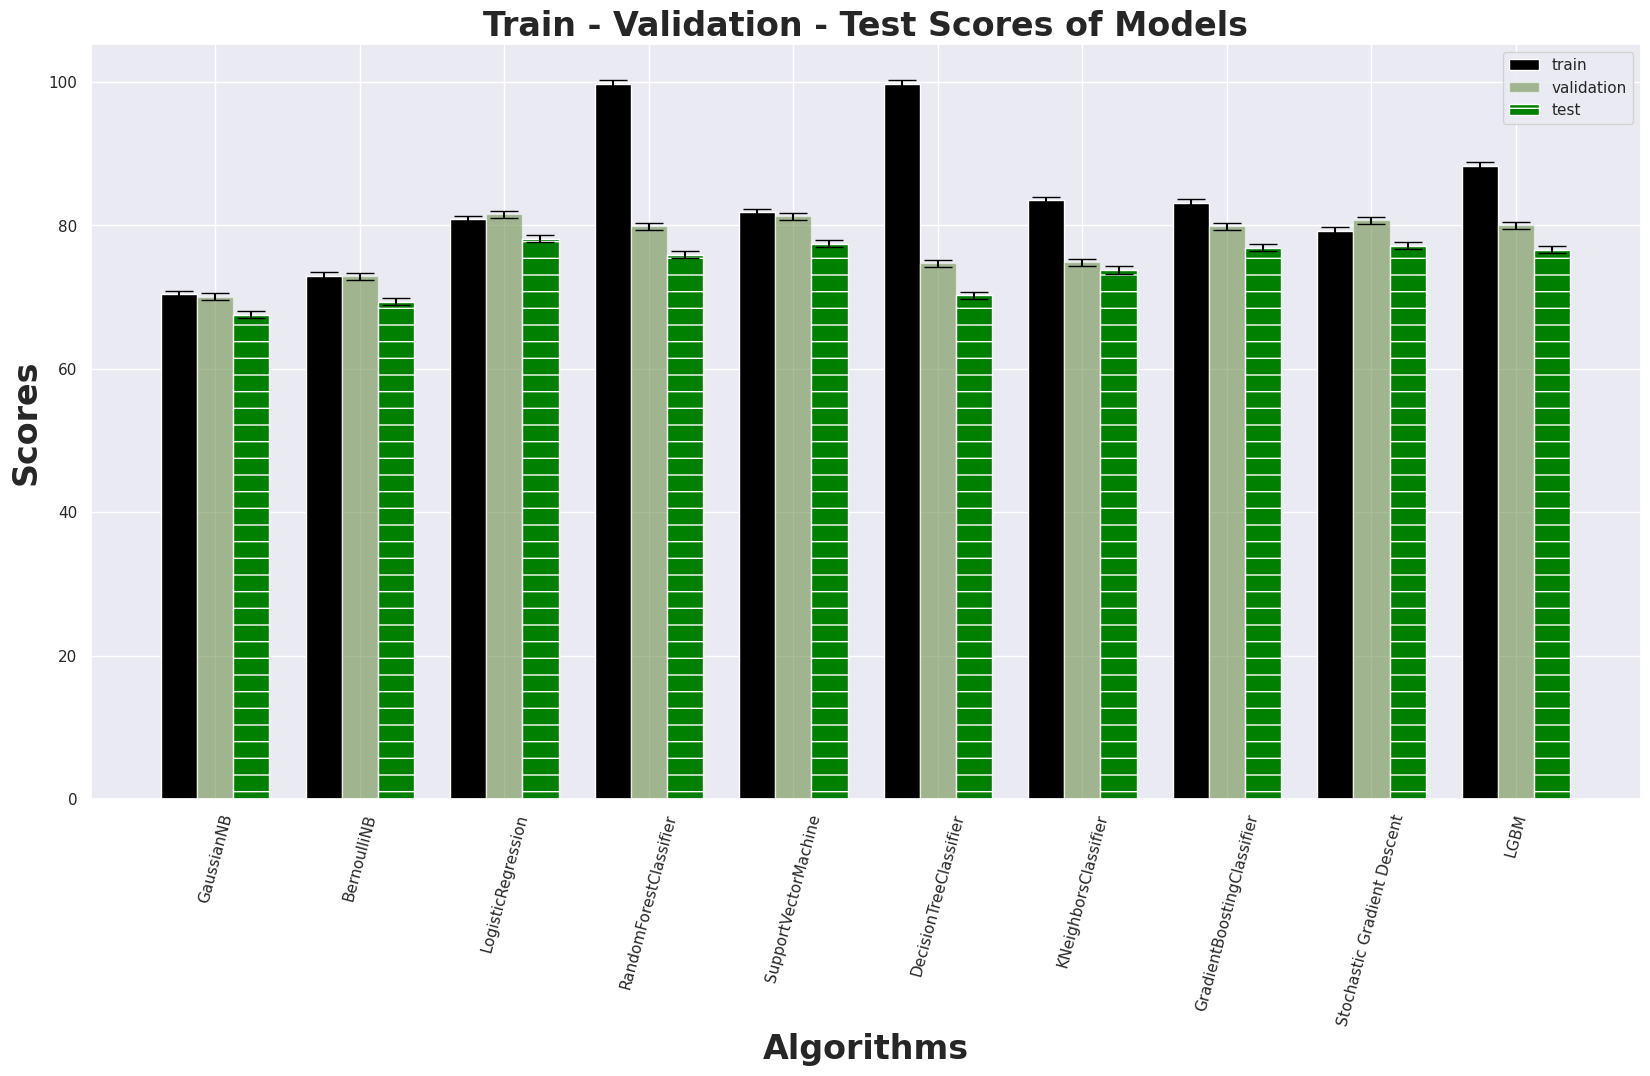

In [ ]:
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
plt.title('Train - Validation - Test Scores of Models', fontweight='bold', size = 24)

barWidth = 0.25
 
bars1 = trainScores
bars2 = validationScores
bars3 = testScores
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
plt.bar(r1, bars1, color='black', width=barWidth, edgecolor='white', label='train', yerr=0.5,ecolor="black",capsize=10)
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='validation', yerr=0.5,ecolor="black",capsize=10, alpha = .50)
plt.bar(r3, bars3, color='green', width=barWidth, edgecolor='white', label='test', yerr=0.5,ecolor="black",capsize=10, hatch = '-')
 
modelNames = ["GaussianNB", 'BernoulliNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'LGBM']
    
plt.xlabel('Algorithms', fontweight='bold', size = 24)
plt.ylabel('Scores', fontweight='bold', size = 24)
plt.xticks([r + barWidth for r in range(len(bars1))], modelNames, rotation = 75)
 
plt.legend()
plt.show()

In [ ]:
table = pd.DataFrame({'Model': modelNames, 'Train': trainScores, 'Validation': validationScores, 'Test': testScores})
table

,Model,Train,Validation,Test
0,GaussianNB,70.376287,70.028409,67.517730
1,BernoulliNB,72.949947,72.869318,69.361702
2,LogisticRegression,80.812922,81.534091,78.156028
3,RandomForestClassifier,99.751509,79.829545,75.886525
4,SupportVectorMachine,81.824636,81.250000,77.446809
5,DecisionTreeClassifier,99.751509,74.715909,70.212766
6,KNeighborsClassifier,83.510827,74.857955,73.758865
7,GradientBoostingClassifier,83.120341,79.829545,76.879433
8,Stochastic Gradient Descent,79.197728,80.681818,77.163121
9,LGBM,88.285410,79.971591,76.595745


<a name="5"></a>
## 5 Refinement
Back to [Table of Contents](#0)

---


<a name="5.1"></a>
### 5.1 Cross Validation
Back to [Table of Contents](#0)

In [ ]:
cv_results_acc = []

for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train, y_train, scoring = "accuracy", cv = 10)
    cv_results_acc.append(cv_score.mean()*100)
    print("%s: %f" % (pipe_dict[i], cv_score.mean()*100))

GaussianNB: 70.446695
BernoulliNB: 72.949278
LogisticRegression: 80.404306
RandomForestClassifier: 79.764906
SupportVectorMachine: 79.783455
DecisionTreeClassifier: 72.825605
KNeighborsClassifier: 75.665161
GradientBoostingClassifier: 80.173778
Stochastic Gradient Descent: 77.777925
LGBM: 79.569839


In [ ]:
table_cv = pd.DataFrame({'Model': modelNames, 'CV Score': cv_results_acc})
table_cv

,Model,CV Score
0,GaussianNB,70.446695
1,BernoulliNB,72.949278
2,LogisticRegression,80.404306
3,RandomForestClassifier,79.764906
4,SupportVectorMachine,79.783455
5,DecisionTreeClassifier,72.825605
6,KNeighborsClassifier,75.665161
7,GradientBoostingClassifier,80.173778
8,Stochastic Gradient Descent,77.777925
9,LGBM,79.569839


No handles with labels found to put in legend.


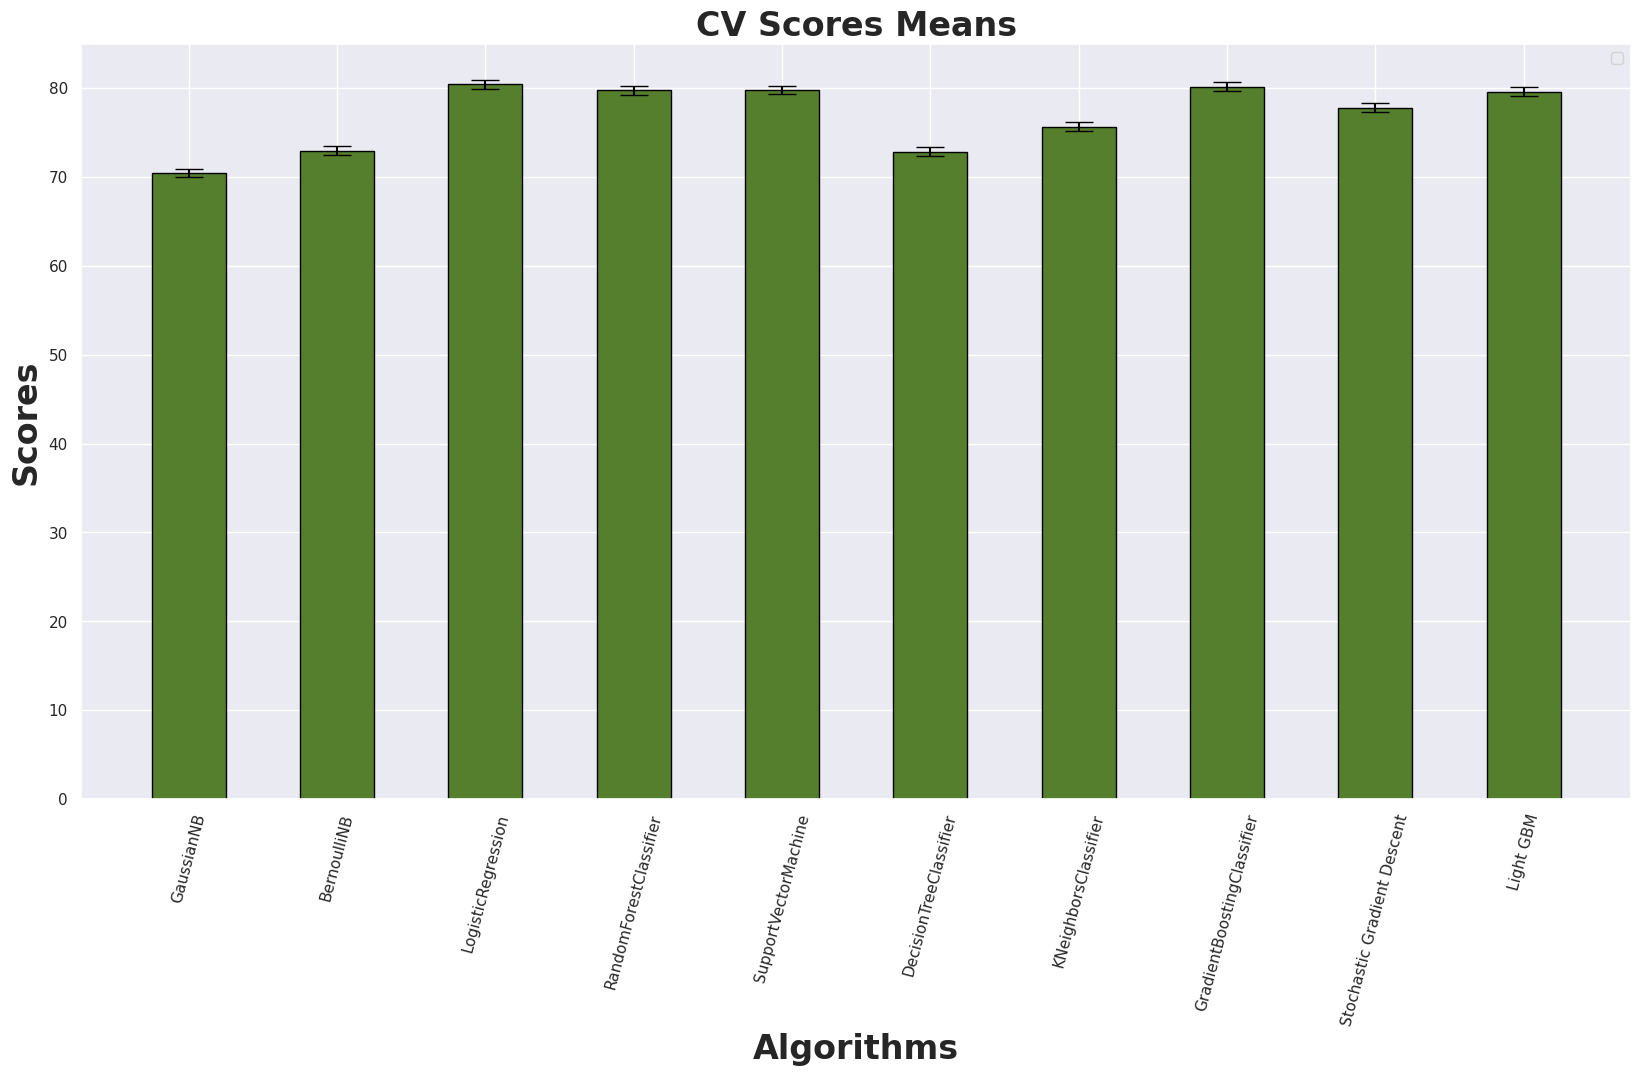

In [ ]:
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
plt.title('CV Scores Means', fontweight='bold', size = 24)

barWidth = 0.5
 
bars2 = cv_results_acc
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='black',  yerr=0.5,ecolor="black",capsize=10)


modelNames = ["GaussianNB", 'BernoulliNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Light GBM']
    
plt.xlabel('Algorithms', fontweight='bold', size = 24)
plt.ylabel('Scores', fontweight='bold', size = 24)
plt.xticks([r + barWidth for r in range(len(bars1))], modelNames, rotation = 75)
 
plt.legend()
plt.show()

<a name="5.2"></a>
### 5.2 Best Features Selection
Back to [Table of Contents](#0)

In [ ]:
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_valid = sc.fit_transform(X_valid)
X_test = sc.transform(X_test)

RandomForestClassifier
Old Shape: (7043, 40) New shape: (7043, 9)




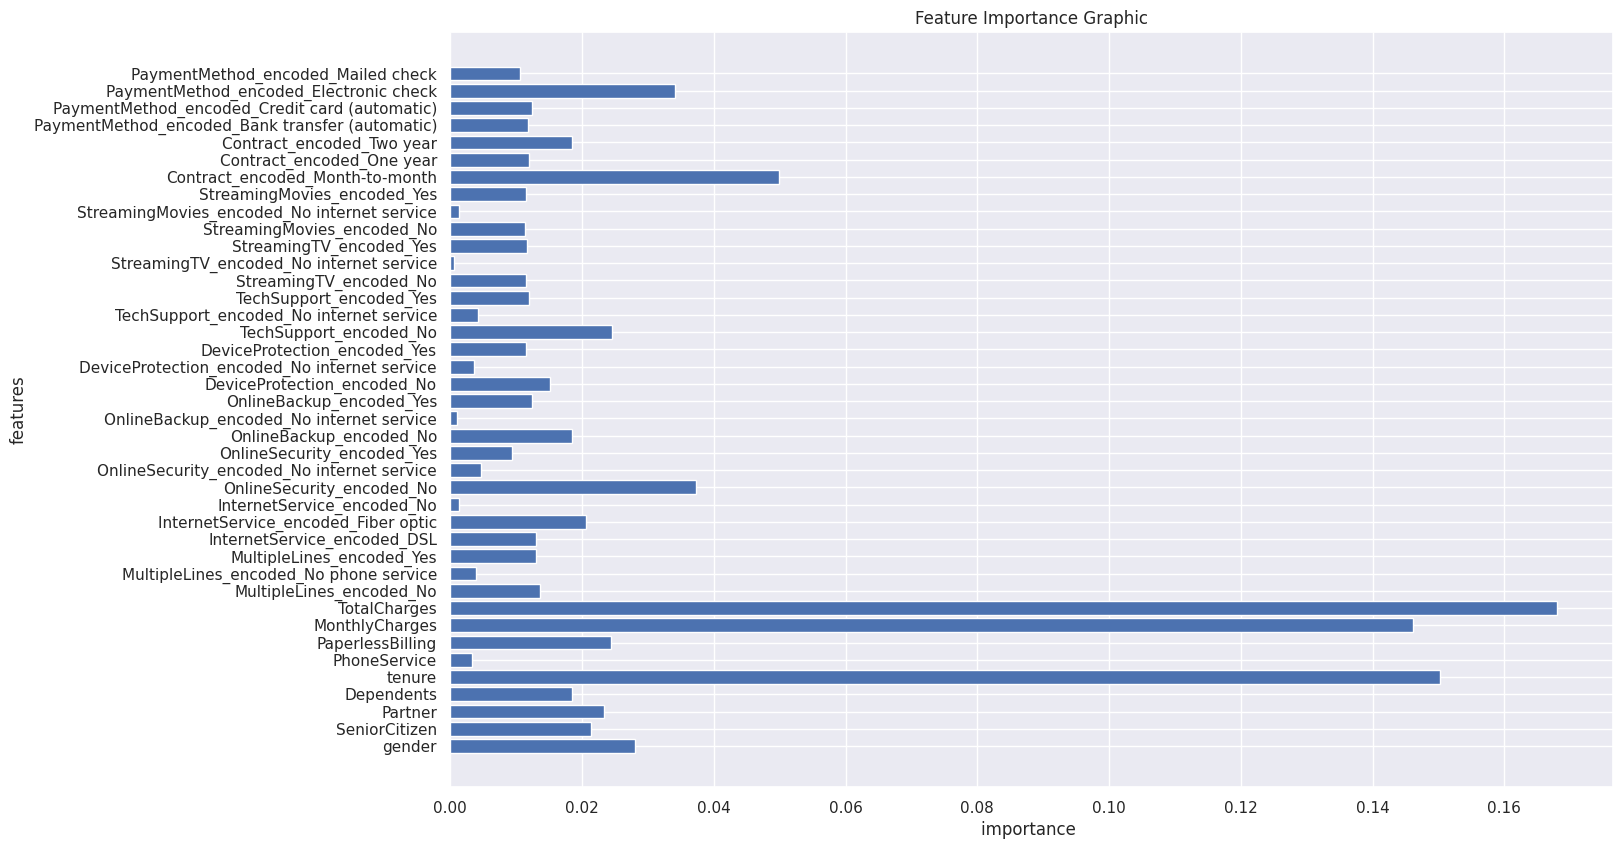

DecisionTreeClassifier
Old Shape: (7043, 40) New shape: (7043, 6)




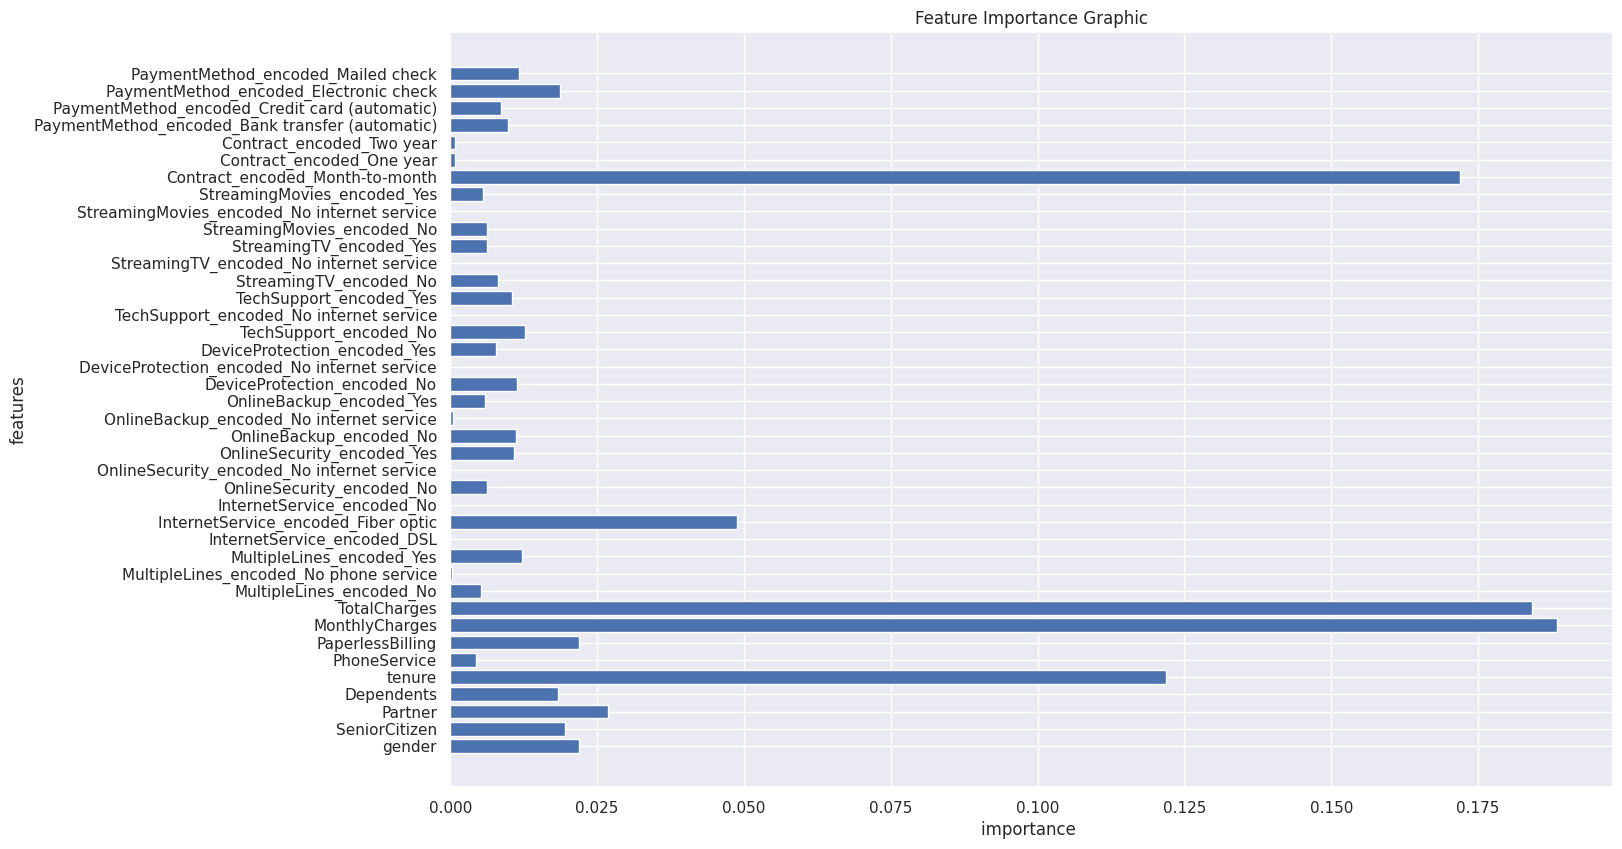

GradientBoostingClassifier
Old Shape: (7043, 40) New shape: (7043, 8)




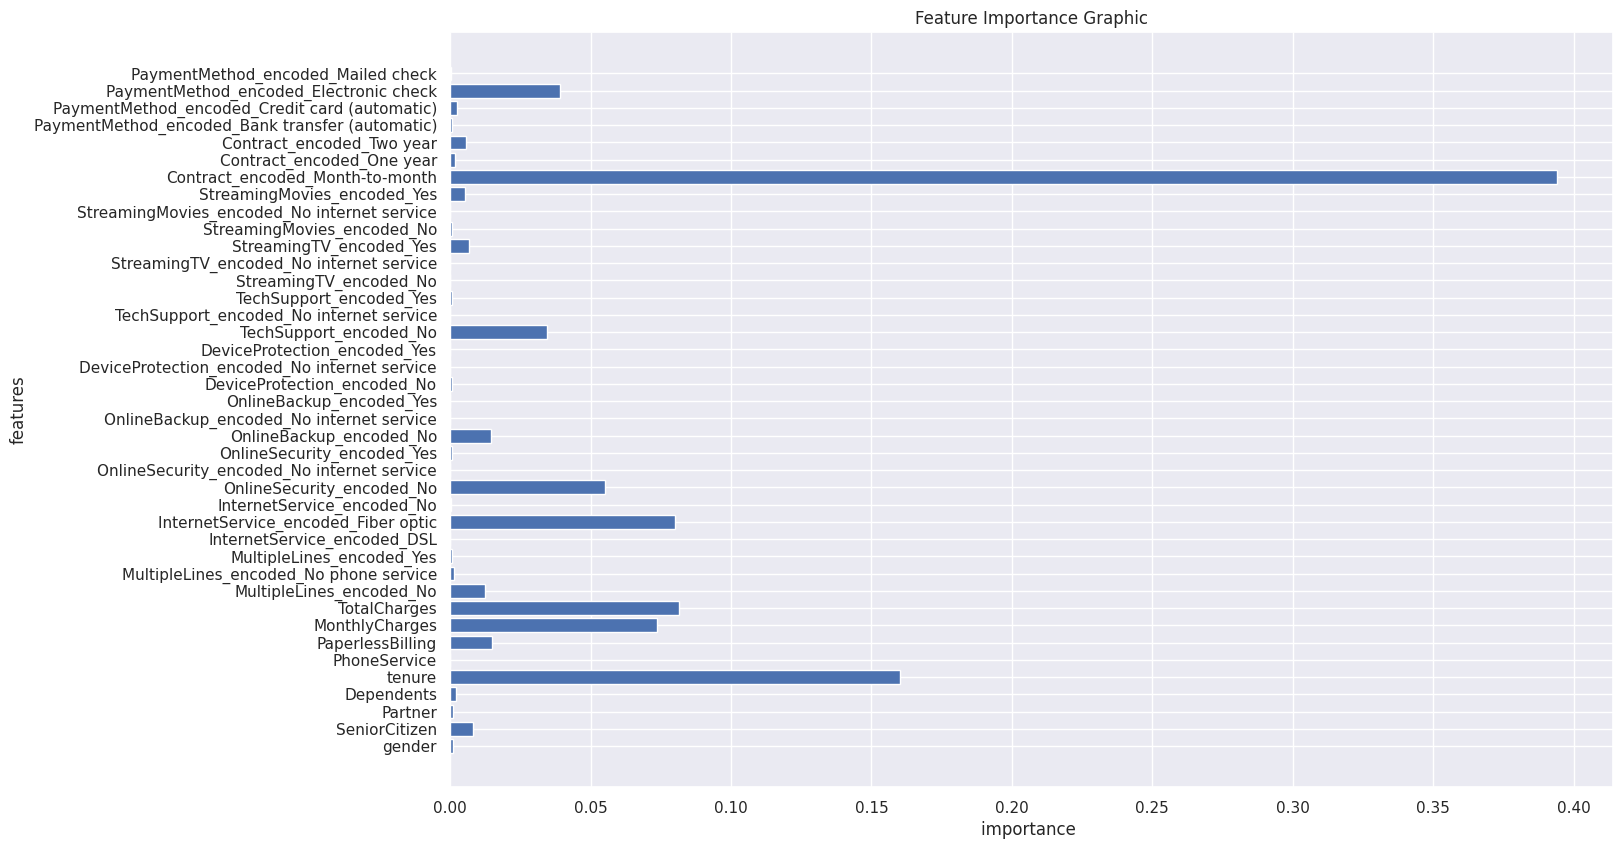

Light GBM
Old Shape: (7043, 40) New shape: (7043, 6)




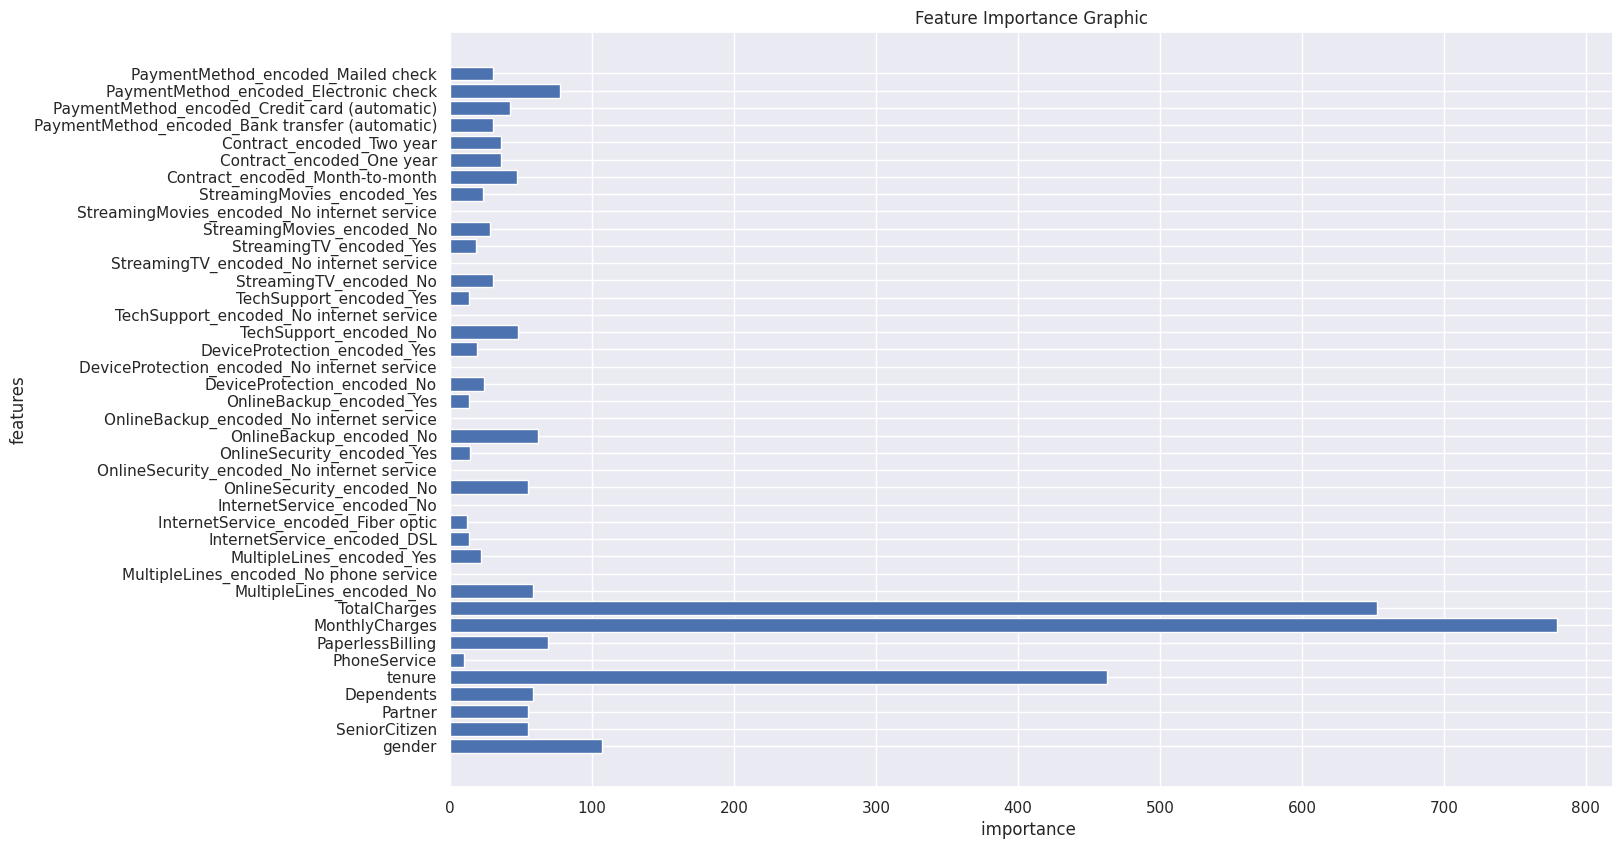

In [ ]:
models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'Light GBM': lightgbm.LGBMClassifier(),
}

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
  
  print(f'{m}') 
  best_features = SelectFromModel(model)
  best_features.fit(X, y)

  transformedX = best_features.transform(X)
  print(f"Old Shape: {X.shape} New shape: {transformedX.shape}")
  print("\n")

  imp_feature = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
  plt.figure(figsize=(15,10))
  plt.title("Feature Importance Graphic")
  plt.xlabel("importance ")
  plt.ylabel("features")
  plt.barh(imp_feature['Feature'],imp_feature['Importance'])
  plt.show()

In [ ]:
models = {
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'Stochastic Gradient Descent':  SGDClassifier(max_iter=5000, random_state=0),
}

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
  
  print(f'{m}') 
  best_features = SelectFromModel(model)
  best_features.fit(X, y)

  transformedX = best_features.transform(X)
  print(f"Old Shape: {X.shape} New shape: {transformedX.shape}")
  print("\n")

BernoulliNB
Old Shape: (7043, 40) New shape: (7043, 19)


LogisticRegression
Old Shape: (7043, 40) New shape: (7043, 16)


Stochastic Gradient Descent
Old Shape: (7043, 40) New shape: (7043, 14)




Gradient Boosting Classifier

In [ ]:
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)

train_score = gbc_model.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

validation_score = gbc_model.score(X_valid, y_valid)
print(f'Validation score of trained model: {validation_score*100}')

test_score = gbc_model.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 83.12034078807243
Validation score of trained model: 79.9715909090909
Test score of trained model: 76.87943262411348


Confusion matrix

Accuracy: 76.87943262411348

Confussion matrix: 
[[443  95]
 [ 68  99]]



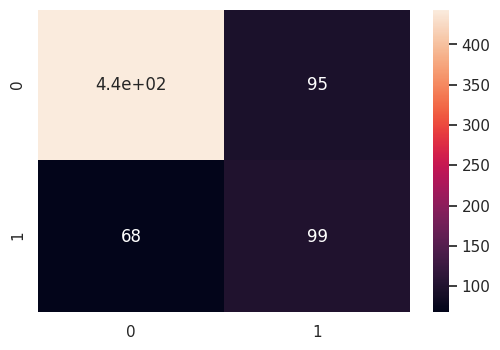

In [ ]:
y_predictions = gbc_model.predict(X_test)

conf_matrix = confusion_matrix(y_predictions, y_test)

print(f'Accuracy: {accuracy_score(y_predictions, y_test)*100}')
print()
print(f'Confussion matrix: \n{conf_matrix}\n')

sns.heatmap(conf_matrix, annot=True)

In [ ]:
tn = conf_matrix[0,0]
fp = conf_matrix[0,1]
tp = conf_matrix[1,1]
fn = conf_matrix[1,0]

total = tn + fp + tp + fn
real_positive = tp + fn
real_negative = tn + fp

In [ ]:
accuracy  = (tp + tn) / total # Accuracy Rate
precision = tp / (tp + fp) # Positive Predictive Value
recall    = tp / (tp + fn) # True Positive Rate
f1score  = 2 * precision * recall / (precision + recall)
specificity = tn / (tn + fp) # True Negative Rate
error_rate = (fp + fn) / total # Missclassification Rate
prevalence = real_positive / total
miss_rate = fn / real_positive # False Negative Rate
fall_out = fp / real_negative # False Positive Rate

print(f'Accuracy    : {accuracy}')
print(f'Precision   : {precision}')
print(f'Recall      : {recall}')
print(f'F1 score    : {f1score}')
print(f'Specificity : {specificity}')
print(f'Error Rate  : {error_rate}')
print(f'Prevalence  : {prevalence}')
print(f'Miss Rate   : {miss_rate}')
print(f'Fall Out    : {fall_out}')

Accuracy    : 0.7687943262411348
Precision   : 0.5103092783505154
Recall      : 0.592814371257485
F1 score    : 0.5484764542936288
Specificity : 0.8234200743494424
Error Rate  : 0.23120567375886525
Prevalence  : 0.23687943262411348
Miss Rate   : 0.40718562874251496
Fall Out    : 0.17657992565055763


Classification Report

In [ ]:
predictions = gbc_model.predict(X_test)

print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       538
           1       0.51      0.59      0.55       167

    accuracy                           0.77       705
   macro avg       0.69      0.71      0.70       705
weighted avg       0.78      0.77      0.77       705



ROC Curve

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC' )
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
probs = gbc_model.predict_proba(X_test)
probs = probs[:, 1]

In [ ]:
auc = roc_auc_score(y_test, probs)
print('AUC: ', auc*100)

AUC:  81.71464885911998


No handles with labels found to put in legend.


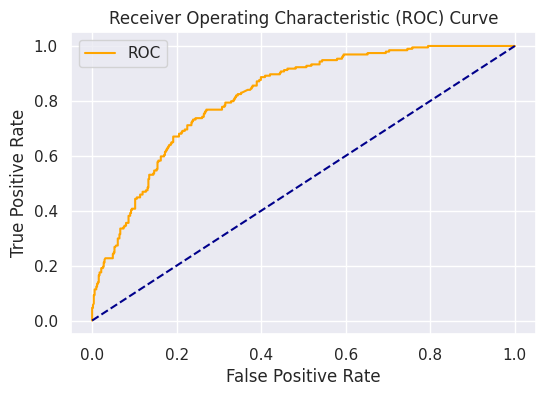

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.legend(loc = 'lower right')
plot_roc_curve(fpr, tpr)

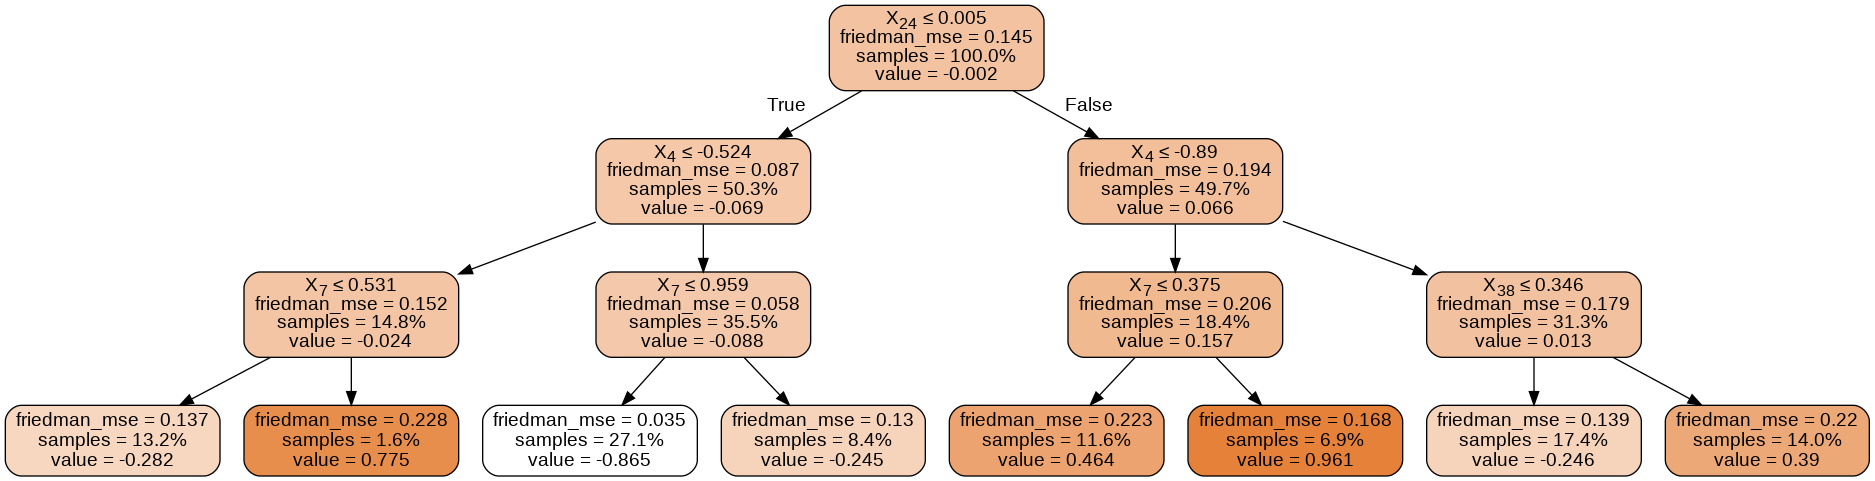

In [ ]:
#####
# This code snippet was taken from this url: https://stackoverflow.com/questions/44974360/how-to-visualize-an-sklearn-gradientboostingclassifier
#####

import pydotplus
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from IPython.display import Image

sub_tree = gbc_model.estimators_[10, 0]
dot_data = export_graphviz(sub_tree, out_file=None, filled=True, 
                           rounded=True, special_characters=True, proportion=True, impurity=True)

graph = graph_from_dot_data(dot_data)
Image(graph.create_png())

<a name="6"></a>
## 6 Ensemble Model
Back to [Table of Contents](#0)

---


<a name="6.1"></a>
### 6.1 Preprocessing
Back to [Table of Contents](#0)

In this notebook we will be using ensemble methods to predict if a customer left the company in the last month. The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve robustness. There are two general categories of ensemble methods: averaging and boosting methods. Decision trees will be used as our base estimator for both.

In [ ]:
import random
import pprint
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, precision_score
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
df = telecomDf.copy(deep = True)

In [ ]:
def preprocessing(df):
    """Preprocess df and return X (train features) and Y (target feature)."""
    # Impute missing values on TotalCharges
    df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float32')
    # Drop customer id
    df.drop(['customerID'], axis=1, inplace=True)
    # Encode categorical features
    cat_cols = [c for c in df.columns if df[c].dtype == 'object' or c == 'SeniorCitizen']
    for col in cat_cols:
        if df[col].nunique() == 2:
            df[col], _ = pd.factorize(df[col])
        else:
            df = pd.get_dummies(df, columns=[col])
    # Drop target column and some correlated features
    drop_features = ['OnlineSecurity_No internet service', 'OnlineBackup_No internet service',
                     'DeviceProtection_No internet service', 'TechSupport_No internet service',
                     'StreamingTV_No internet service', 'StreamingMovies_No internet service',
                     'PhoneService', 'Churn']
    feats = [c for c in df.columns if c not in drop_features]
    return df[feats], df['Churn']
x, y = preprocessing(df)
x.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,0,1,0,29.85,29.850000,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0
1,1,0,1,0,34,1,56.95,1889.500000,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1
2,1,0,1,0,2,0,53.85,108.150002,1,0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1


Split data: Divide our data in 80% for training and 20% for our final test.

In [ ]:
# Split dataset in train and test
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=50)
# Create a training and testing dataset (lightgbm api object)
train_set = lgb.Dataset(data= train_x, label= train_y, silent=-1)
test_set = lgb.Dataset(data= test_x, label= test_y, silent=-1)

<a name="6.2"></a>
### 6.2 Hyperparameter Tuning
Back to [Table of Contents](#0)



We have to define many hyperparameters since we have the ensemble estimator and the base estimator. Instead of doing this by hand, the next function will randomly pick a set of parameters and test it with a KFold cross-validation scheme. The LightGBM library has a built-in function to easily implement this validation method.

The procedure can be described with the following steps:

- Randomly pick a subset of hyperparameters
- Train and validate our model with KFold cross-validation (second function)
- Repeat this procedure MAX_EVALS times
- Get the best cross-validation score and hyperparameters


Early stopping will be used to stop the algorithm when the validation score doesn't improve for 50 boosting rounds.

In [ ]:
def hyperparameter_random_search(train_set, params_grid, fixed_params, max_evals,
                                 num_folds, print_params=False):
    """Random search for hyperparameter optimization"""
    # Dataframe for results
    results = pd.DataFrame(columns = ['score', 'params', 'iteration'],
                                  index = list(range(max_evals)))
    
    # Keep searching until reach max evaluations
    for i in range(max_evals):
        # Choose random hyperparameters
        hyperparameters = {k: random.sample(v, 1)[0] for k, v in params_grid.items()}
        hyperparameters.update(fixed_params)
        if print_params:
            print(hyperparameters)
        # Evaluate randomly selected hyperparameters
        eval_results = objective(train_set, hyperparameters, i, num_folds)
        # Add results to our dataframe
        results.loc[i, :] = eval_results
    # Sort with best score on top
    results.sort_values('score', ascending=False, inplace=True)
    results.reset_index(inplace=True)
    return results

def objective(train_set, hyperparameters, iteration, num_folds):
    """Objective function for grid and random search. Returns
       the cross-validation score from a set of hyperparameters."""

     # Perform n_folds cross validation
    hyperparameters['verbose'] = -1
    cv_results = lgb.cv(hyperparameters, train_set, num_boost_round=10000, nfold=num_folds,
                        early_stopping_rounds=50, metrics ='auc', seed=50)
    score = cv_results['auc-mean'][-1]
    estimators = len(cv_results['auc-mean'])
    hyperparameters['n_estimators'] = estimators 
    return score, hyperparameters, iteration

<a name="6.3"></a>
### 6.3 Random Forest
Back to [Table of Contents](#0)



The idea behind Random Forests is to build multiple decision trees and merges them together to get a more accurate and stable prediction. In each estimator, only a random subset of the features is taken into consideration for splitting a node, therefore adding additional randomness to the final model. Random Forests can be considered an averaging ensemble method.

In [ ]:
params_grid = {
    'num_leaves': list(range(8, 255)),  # Control tree size
    # Percentage (sample) of columns and rows
    'colsample_bytree': list(np.linspace(0.4, 0.99)),
    'subsample': list(np.linspace(0.4, 0.99)),
    # Min data points to create a leaf
    'min_child_samples': list(range(1, 101, 5)),
    # Regularization
    'reg_alpha': list(np.linspace(0, 1)),
    'reg_lambda': list(np.linspace(0, 1)),
}

fixed_params = {'boosting_type': 'rf', 'objective': 'binary',
                'subsample_freq': 1, 'n_jobs':4}
res = hyperparameter_random_search(train_set, params_grid, fixed_params, 1000, 5)
res.head()

,index,score,params,iteration
0,182,0.849026,"{'num_leaves': 32, 'colsample_bytree': 0.56857...",182
1,179,0.848987,"{'num_leaves': 253, 'colsample_bytree': 0.5204...",179
2,84,0.848944,"{'num_leaves': 189, 'colsample_bytree': 0.5083...",84
3,575,0.848897,"{'num_leaves': 132, 'colsample_bytree': 0.5204...",575
4,127,0.848819,"{'num_leaves': 42, 'colsample_bytree': 0.52040...",127


Testing the model

In [ ]:
# Create, train, test model
model = lgb.LGBMClassifier(**res.loc[0, 'params'], random_state=50)
model.fit(train_x.values, train_y.values)
predict_proba = model.predict_proba(test_x.values)[:, 1]
predict_labels = model.predict(test_x.values)

# Print final results
print("Scores on test set: {:.4f} ROC AUC,  {:.4f} accuracy, {:.4f} recall, {:.4f} precision"
      .format(roc_auc_score(test_y, predict_proba),
              accuracy_score(test_y, predict_labels),
              recall_score(test_y, predict_labels), 
              precision_score(test_y, predict_labels)))

Scores on test set: 0.8437 ROC AUC,  0.7970 accuracy, 0.5652 recall, 0.6228 precision


<a name="6.4"></a>
### 6.4 Gradient Boosting
Back to [Table of Contents](#0)



In gradient boosting, the predictors are not made independently, but sequentially. In each iteration, a decision tree is fit on the error from the previous round. It's usually better to use shallow trees (weak learners) and a low learning rate, so each iteration does small improvements to the overall problem.

In [ ]:
# Possible hyperparameters (grid)
param_grid = {
    'num_leaves': list(range(7, 95)),
    'learning_rate': list(np.logspace(np.log(0.005), np.log(0.2))),
    'subsample_for_bin': list(range(20000, 300000, 20000)),
    'min_child_samples': list(range(20, 500, 5)),
    'reg_alpha': list(np.linspace(0, 1)),
    'reg_lambda': list(np.linspace(0, 1)),
    'colsample_bytree': list(np.linspace(0.4, 1, 10)),
    'subsample': list(np.linspace(0.5, 1, 100)),
}
fixed_params = {'boosting': 'gbdt', 'objective': 'binary', 'n_jobs': 4}
res = hyperparameter_random_search(train_set, param_grid, fixed_params, 1000, 5)
res.head()

,index,score,params,iteration
0,40,0.850262,"{'num_leaves': 69, 'learning_rate': 0.02066706...",40
1,121,0.85014,"{'num_leaves': 70, 'learning_rate': 0.01033108...",121
2,57,0.850076,"{'num_leaves': 63, 'learning_rate': 0.01461208...",57
3,81,0.849993,"{'num_leaves': 87, 'learning_rate': 0.00730431...",81
4,439,0.849989,"{'num_leaves': 27, 'learning_rate': 0.01228652...",439


Testing the model

In [ ]:
# Create, train, test model
model = lgb.LGBMClassifier(**res.loc[0, 'params'], random_state=50)
model.fit(train_x.values, train_y.values)
predict_proba = model.predict_proba(test_x.values)[:, 1]
predict_labels = model.predict(test_x.values)

# Print final results
print("Scores on test set: {:.4f} ROC AUC,  {:.4f} accuracy, {:.4f} recall, {:.4f} precision"
      .format(roc_auc_score(test_y, predict_proba),
              accuracy_score(test_y, predict_labels),
              recall_score(test_y, predict_labels), 
              precision_score(test_y, predict_labels)))

Scores on test set: 0.8459 ROC AUC,  0.8055 accuracy, 0.5299 recall, 0.6588 precision


In this short notebook, we compared the performance of two ensemble methods in a binary classification problem. The first algorithm (Random Forests) is an averaging ensemble technique that train multiple decision trees in parallel and combine their predictions. Our second classifier was a boosting ensemble method, also using decision trees as base estimator.

Hyperparameters were found using random search with a KFold validation scheme over more than one thousand tries for each estimator.